## The Sparks Foundation - Internship

## Lakshit Gupta

## Data Science And Business Analytics

## Task 2

Task Goal: From the given 'Iris' dataset, predict optimum number of clusters and represent it visually

Dataset Info: Iris Dataset contains 4 features of Iris (Iris Setosa, Iris Versicolor, Iris Virginica)

### Importing Necessary Libraries/Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Now it is time to find the optimum number of clusters for K-Means Classification

In [3]:
X = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    clust.append(kmeans.inertia_)

#### It is now time to plot line graph for the above result and observe the line and identify the point where cluster elbow occurs

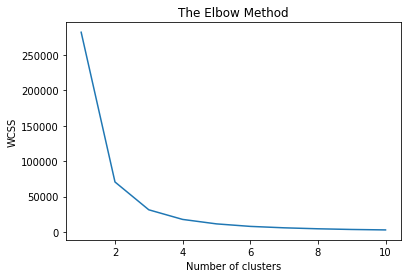

In [4]:
plt.plot(range(1,11),clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

With the help of Elbow method we can observe that and elbow point is visible in the graph. The optimum number of cluster is where the elbow occurs.

So in our case the optimum number of cluster is 3

#### It is now time to apply kmeans to the dataset with the optimum number of cluster

In [6]:
k_means = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = k_means.fit_predict(X)

Since we have made predictions based on the optimum number of clusters and fitted the model, let us now visually represent the result interpreted.

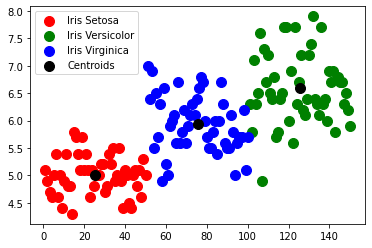

In [7]:
plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris Setosa')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris Versicolor')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris Virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s =100, c = 'black', label = 'Centroids')
plt.legend()

From the above plot it is clear that there are 3 clusters and each has centroids that are represented with black color.